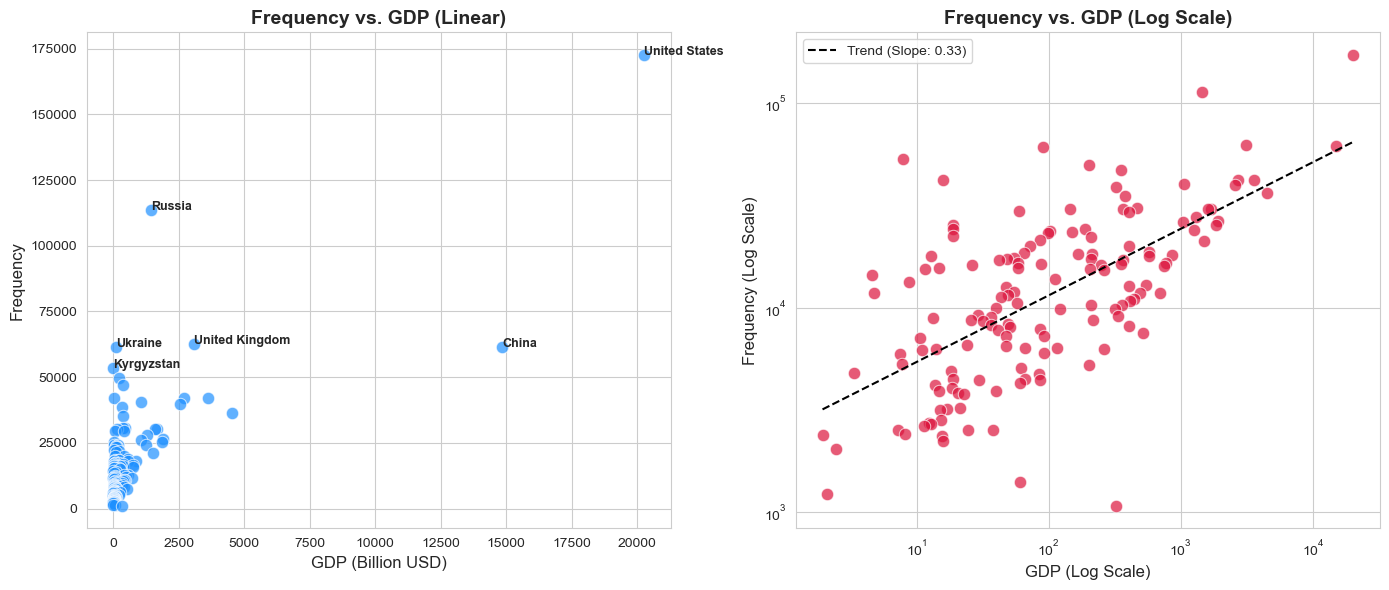

Spearmen Correlation: 0.610


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 1. Load Data
# Assumes the file is in the same directory as the script
file_path = 'final_complete_dataset.csv'
df = pd.read_csv(file_path)

# 2. Create Visualization
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# --- Plot 1: Standard Linear Scale ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df, 
    x='Average_GDP_Last_10_Years_Billion_USD', 
    y='Frequency',
    alpha=0.7,
    s=80,
    color='dodgerblue'
)
plt.title('Frequency vs. GDP (Linear)', fontsize=14, weight='bold')
plt.xlabel('GDP (Billion USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Label top outliers (Rich or Frequent)
df['importance'] = df['Frequency'] + df['Average_GDP_Last_10_Years_Billion_USD']
top_countries = df.nlargest(6, 'importance')
for i, row in top_countries.iterrows():
    plt.text(row['Average_GDP_Last_10_Years_Billion_USD'], row['Frequency'], row['Country'], fontsize=9, weight='bold')

# --- Plot 2: Log-Log Scale (Best for finding trends) ---
plt.subplot(1, 2, 2)
plot = sns.scatterplot(
    data=df, 
    x='Average_GDP_Last_10_Years_Billion_USD', 
    y='Frequency',
    alpha=0.7,
    s=80,
    color='crimson'
)
plot.set(xscale="log", yscale="log")

plt.title('Frequency vs. GDP (Log Scale)', fontsize=14, weight='bold')
plt.xlabel('GDP (Log Scale)', fontsize=12)
plt.ylabel('Frequency (Log Scale)', fontsize=12)

# Add Trend Line
df_log = df[(df['Average_GDP_Last_10_Years_Billion_USD'] > 0) & (df['Frequency'] > 0)]
x_log = np.log10(df_log['Average_GDP_Last_10_Years_Billion_USD'])
y_log = np.log10(df_log['Frequency'])
z = np.polyfit(x_log, y_log, 1)
p = np.poly1d(z)
x_range = np.linspace(min(x_log), max(x_log), 100)
plt.plot(10**x_range, 10**p(x_range), "k--", label=f'Trend (Slope: {z[0]:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

# Print Correlation
corr = df[['Frequency', 'Average_GDP_Last_10_Years_Billion_USD']].corr(method='spearman').iloc[0, 1]
print(f"Spearmen Correlation: {corr:.3f}")

DEMOCRACY

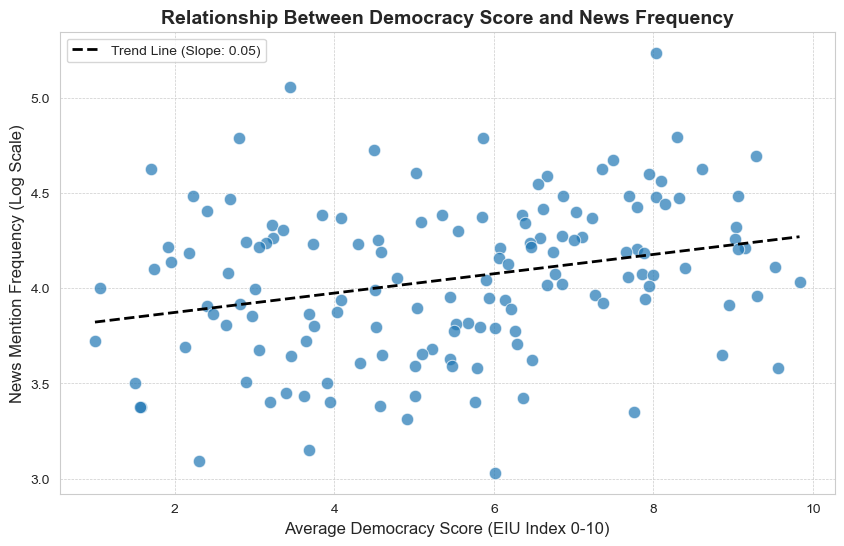

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the data
df = pd.read_csv('final_complete_dataset.csv')

# Filter out rows where Frequency is zero, as log(0) is undefined
df_plot = df[df['Frequency'] > 0].copy()

# 2. Define variables and create log-transformed frequency
x_var = 'Average_Democracy_Score'
y_var = 'Frequency'
df_plot['Log_Frequency'] = np.log10(df_plot[y_var])

# 3. Create the plot
plt.figure(figsize=(10, 6))

# Create scatter plot (Democracy Score on X-axis, Log Frequency on Y-axis)
sns.scatterplot(x=x_var, y='Log_Frequency', data=df_plot, alpha=0.7, s=80)

# 4. Add Linear Trend Line (Linear fit on Democracy Score vs. Log Frequency)
x_data = df_plot[x_var]
y_data = df_plot['Log_Frequency']

# Calculate linear regression line parameters (slope, intercept)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)

# Create smooth line for plotting
x_range = np.linspace(x_data.min(), x_data.max(), 100)
plt.plot(x_range, p(x_range), "k--", 
         label=f'Trend Line (Slope: {z[0]:.2f})', 
         linewidth=2)

# 5. Final Formatting
plt.title('Relationship Between Democracy Score and News Frequency', fontsize=14, weight='bold')
plt.xlabel('Average Democracy Score (EIU Index 0-10)', fontsize=12)
plt.ylabel('News Mention Frequency (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()


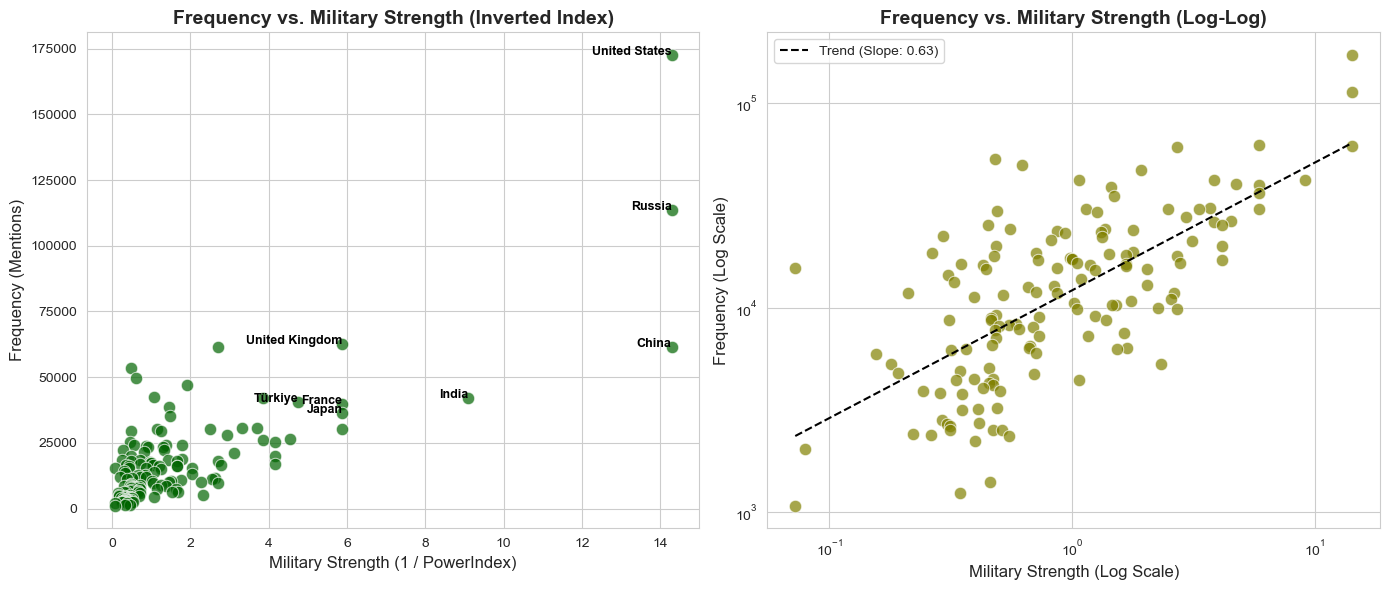

Spearman Correlation: 0.654
-> Strong positive relationship: Stronger militaries are mentioned significantly more often.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load Data
df = pd.read_csv('final_complete_dataset.csv')

# 2. Transform Data
# PowerIndex: Lower is better (0.07 is US, 4.0 is weak).
# We invert it so Higher = Stronger, making the plot intuitive.
df['Military_Strength'] = 1 / df['PowerIndex']

# 3. Visualization
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# --- Plot 1: Linear Scale ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df, 
    x='Military_Strength', 
    y='Frequency',
    alpha=0.7,
    s=80,
    color='darkgreen'
)
plt.title('Frequency vs. Military Strength (Inverted Index)', fontsize=14, weight='bold')
plt.xlabel('Military Strength (1 / PowerIndex)', fontsize=12)
plt.ylabel('Frequency (Mentions)', fontsize=12)

# Label top outliers (Strongest + Most Frequent)
# We create a composite score just for labeling purposes
df['label_score'] = df['Frequency'].rank(pct=True) + df['Military_Strength'].rank(pct=True)
top_countries = df.nlargest(8, 'label_score')

for i, row in top_countries.iterrows():
    plt.text(
        row['Military_Strength'], 
        row['Frequency'], 
        row['Country'], 
        fontsize=9, 
        weight='bold', 
        color='black',
        ha='right'
    )

# --- Plot 2: Log-Log Scale ---
# This is best for power-law data (like country stats)
plt.subplot(1, 2, 2)
plot = sns.scatterplot(
    data=df, 
    x='Military_Strength', 
    y='Frequency',
    alpha=0.7,
    s=80,
    color='olive'
)
plot.set(xscale="log", yscale="log")

plt.title('Frequency vs. Military Strength (Log-Log)', fontsize=14, weight='bold')
plt.xlabel('Military Strength (Log Scale)', fontsize=12)
plt.ylabel('Frequency (Log Scale)', fontsize=12)

# Add Trend Line
df_clean = df[df['Military_Strength'] > 0].copy() # Ensure no divide by zero errors
x_log = np.log10(df_clean['Military_Strength'])
y_log = np.log10(df_clean['Frequency'])

z = np.polyfit(x_log, y_log, 1)
p = np.poly1d(z)
x_range = np.linspace(min(x_log), max(x_log), 100)
plt.plot(10**x_range, 10**p(x_range), "k--", label=f'Trend (Slope: {z[0]:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

# 4. Correlation Stats
corr = df[['Frequency', 'Military_Strength']].corr(method='spearman').iloc[0, 1]
print(f"Spearman Correlation: {corr:.3f}")
if corr > 0.6:
    print("-> Strong positive relationship: Stronger militaries are mentioned significantly more often.")